<a href="https://colab.research.google.com/github/Jasminewakini/wk4-IP-Autolib-electric-car-sharing/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_01_Jasmine_Wakini_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autolib electric car-sharing service company**

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Testing whether the average number of Bluecars taken on weekdays is different from the average number of Bluecars taken on weekends.

### b) Defining the Metric for Success

> Results that are going to determine whether the average number of Blucars taken on weekdays is different from that taken on the weekends

### c) Understanding the context 

> I will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

> The claim is that the average number of Bluecars taken on weekdays is different from the average number of Bluecars taken on weekends.

### d) Recording the Experimental Design

1. Defining the Question 

2. Reading the Data

3.  Checking the Data

4.  External Data Source Validation

5.  Tidying the Dataset

6.  Exploratory Analysis

7.  Statistical Sampling

8.  Statistical distribution.

9.  Hypothesis Conclusion.



### e) Data Relevance

The varibles given in the dataset will be sufficient to  conduct our analysis.

## 2. Reading the Data

In [ ]:
# Importing our libraries
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#loading the description data
variable_definition = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
variable_definition

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Loading the Data from the source i.e. csv
autolib_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
autolib_df.shape

(16085, 13)

In [ ]:
# Previewing the top of our dataset
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Previewing the bottom of our dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
# Checking the data set information
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.


### a.Validation

According to the external data source from Autolib official webpage,the dataset is valid.

## 5. Tidying the Dataset

In [ ]:
# drop unnecessary columns. Since we are interested in the bluecars, 
# columns relating to the utilib and slots are dropped

autolib_df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace=True)
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


In [ ]:
# fixing messy column names by standardizing the format of the column names

autolib_df.columns = autolib_df.columns.str.strip().str.replace('(', '').str.lower().str.replace(' ', '_').str.replace(')', '')

# Rename the dayOfWeek column name
autolib_df.rename(columns={'dayofweek':'day_of_week'}, inplace=True)

autolib_df.head()

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [ ]:
# Identify duplicate data and drop it

autolib_df = autolib_df.drop_duplicates()

# check the shape of the data to see if there were any duplicates
autolib_df.shape

# The dataset has no duplicates, the initial shape was 16085 after the shape still remained 16085

(16085, 7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


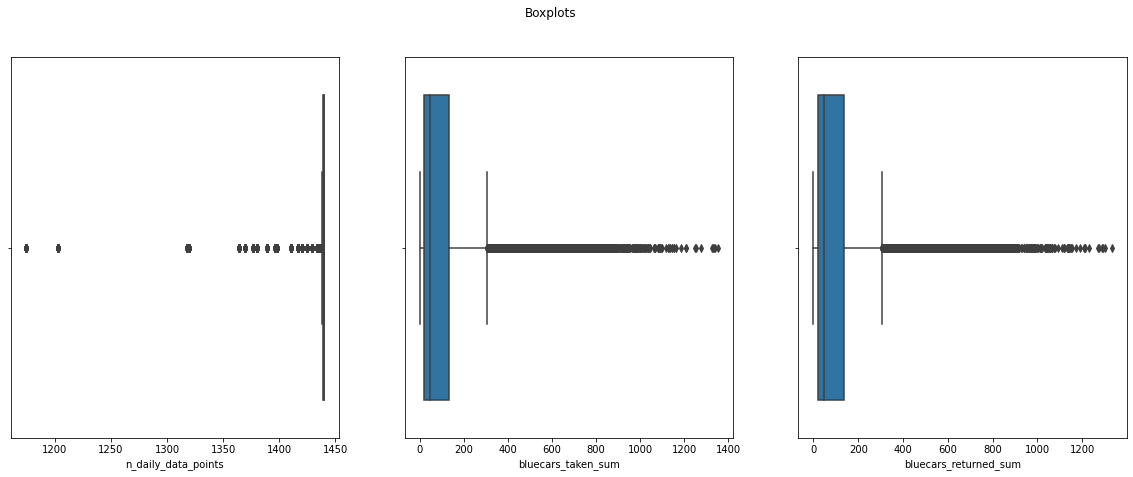

In [ ]:
# Checking for outliers 
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(autolib_df['n_daily_data_points'], ax=ax1)
sns.boxplot(autolib_df['bluecars_taken_sum'], ax=ax2)
sns.boxplot(autolib_df['bluecars_returned_sum'], ax=ax3)
plt.show()

#By observation there are outliers in the data 

In [ ]:
# Removing outliers based on the IQR range and stores the result in the data frame 
# ---
# 
Q1= autolib_df.quantile(0.25)
Q3 = autolib_df.quantile(0.75)
IQR = Q3-Q1
IQR

autolib_out = autolib_df[~((autolib_df < (Q1 - 1.5 * IQR)) |(autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]
autolib_out.shape

# Printing the shape of our new dataset versus the old one 
# ---
# 
print(autolib_out.shape)
print(autolib_df.shape)

(10024, 7)
(16085, 7)


In [ ]:
# Checking for Anomalies
#
# n_daily_data_points
q1_n_daily_data_points = autolib_out['n_daily_data_points'].quantile(.25)
q3_n_daily_data_points = autolib_out['n_daily_data_points'].quantile(.75)

iqr_points = q3_n_daily_data_points - q1_n_daily_data_points


# bluecars_taken_sum
q1_bluecars_taken_sum = autolib_out['bluecars_taken_sum'].quantile(.25)
q3_bluecars_taken_sum = autolib_out['bluecars_taken_sum'].quantile(.75)

iqr_taken = q3_bluecars_taken_sum - q1_bluecars_taken_sum


# bluecars_returned_sum
q1_bluecars_returned_sum = autolib_out['bluecars_returned_sum'].quantile(.25)
q3_bluecars_returned_sum = autolib_out['bluecars_returned_sum'].quantile(.75)

iqr_returned = q3_bluecars_returned_sum - q1_bluecars_returned_sum

print(iqr_points)
print(iqr_taken)
print(iqr_returned)

0.0
53.0
53.0


In [ ]:
# Identifying the Missing Data
#
autolib_out.isnull().values.sum()

0

In [ ]:
autolib_out.isnull().sum()

postal_code              0
date                     0
n_daily_data_points      0
day_of_week              0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
dtype: int64

There are no missing values

In [ ]:
autolib_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10024 entries, 3899 to 16083
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   postal_code            10024 non-null  int64 
 1   date                   10024 non-null  object
 2   n_daily_data_points    10024 non-null  int64 
 3   day_of_week            10024 non-null  int64 
 4   day_type               10024 non-null  object
 5   bluecars_taken_sum     10024 non-null  int64 
 6   bluecars_returned_sum  10024 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 626.5+ KB


In [ ]:
# change date column from object to date

autolib_out['date'] = pd.to_datetime(autolib_out['date']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# More data cleaning procedures
autolib_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10024 entries, 3899 to 16083
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   postal_code            10024 non-null  int64         
 1   date                   10024 non-null  datetime64[ns]
 2   n_daily_data_points    10024 non-null  int64         
 3   day_of_week            10024 non-null  int64         
 4   day_type               10024 non-null  object        
 5   bluecars_taken_sum     10024 non-null  int64         
 6   bluecars_returned_sum  10024 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 626.5+ KB


In [ ]:
# Convert the date column to the index column
autolib_out = autolib_out.set_index('date') 

# Convert the day of the week column shown in number into the name of the day in a new column called "day_name"
autolib_out['day_name'] = autolib_out.index.day_name()

# checking if the changes were made
autolib_out.head()

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,day_name
date,,,,,,,
2018-01-01,91330,1440,0,weekday,19,9,Monday
2018-01-02,91330,1438,1,weekday,10,10,Tuesday
2018-01-03,91330,1439,2,weekday,11,13,Wednesday
2018-01-05,91330,1440,4,weekday,10,6,Friday
2018-01-07,91330,1440,6,weekend,28,17,Sunday


## 6. Exploratory Analysis

### Univariate Analysis

#### Measures of central tendancy

In [ ]:
# Mean
# Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. 
# In a way, it is a single number which can estimate the value of whole data set.

# Finding the mean
print('The average number of bluecars taken is: ', round(autolib_out['bluecars_taken_sum'].mean(),2))
print('The average number of bluecars returned is: ', round(autolib_out['bluecars_returned_sum'].mean(),2))

The average number of bluecars taken is:  51.84
The average number of bluecars returned is:  51.82


In [ ]:
# Median
# Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it 
# is same as number of terms on left side of it when data is arranged in either ascending or descending order.

# Finding the median
print('The median number of bluecars taken is: ', round(autolib_out['bluecars_taken_sum'].median(),2))
print('The median number of bluecars returned is: ', round(autolib_out['bluecars_returned_sum'].median(),2))

The median number of bluecars taken is:  35.0
The median number of bluecars returned is:  35.0


In [ ]:
# Mode 
# Mode is the term appearing maximum time in data set i.e. term that has highest frequency.

# Finding the mode
print('The mode number of bluecars taken is: ', round(autolib_out['bluecars_taken_sum'].mode(),2))
print('The mode number of bluecars returned is: ', round(autolib_out['bluecars_returned_sum'].mode(),2))

The mode number of bluecars taken is:  0    12
dtype: int64
The mode number of bluecars returned is:  0    13
dtype: int64


#### Measures of dispersion

In [ ]:
# Standard Deviation  
# Standard deviation is the measurement of average distance between each quantity and mean. 
# That is, how data is spread out from mean

# Finding the standard deviation
print('The standard deviation of bluecars taken is: ', round(autolib_out['bluecars_taken_sum'].std(),2))
print('The standard deviation of bluecars returned is: ', round(autolib_out['bluecars_returned_sum'].std(),2))

The standard deviation of bluecars taken is:  50.22
The standard deviation of bluecars returned is:  50.14


In [ ]:
# Variance
# Variance is a square of average distance between each values and mean. 
# That is it is square of standard deviation.

# Finding the variance
print('The variance of bluecars taken is: ', round(autolib_out['bluecars_taken_sum'].var(),2))
print('The variance of bluecars returned is: ', round(autolib_out['bluecars_returned_sum'].var(),2))

The variance of bluecars taken is:  2522.52
The variance of bluecars returned is:  2513.55


In [ ]:
# Skewness
# Skewness is a measure of the asymmetry of the probability distribution 
# of a real-valued random variable about its mean

# Determining the skeweness
autolib_out[['bluecars_taken_sum','bluecars_returned_sum']].skew()

#For skewness, if the value is greater than + 1.0,
# the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed

#Right Skewed

bluecars_taken_sum       1.875107
bluecars_returned_sum    1.880169
dtype: float64

In [ ]:
# Kurtosis
# Kurtosis is a measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.

# Determining the kurtosis
autolib_out[['bluecars_taken_sum','bluecars_returned_sum']].kurt()

# this is a leptokurtic distribution

bluecars_taken_sum       4.173840
bluecars_returned_sum    4.184956
dtype: float64

In [ ]:
#  Range
# Range is the difference between lowest and highest value.
# ---

# Finding the min and max values of Respondent Age
bluecars_taken_sum_max = autolib_out["bluecars_taken_sum"].max()
bluecars_taken_sum_min = autolib_out["bluecars_taken_sum"].min()


print(bluecars_taken_sum_max)
print(bluecars_taken_sum_min)
# Calculating the range
bluecars_taken_sum_max -bluecars_taken_sum_min

302
0


302

In [ ]:
# Finding the min and max values of household size
bluecars_returned_sum_max = autolib_out["bluecars_returned_sum"].max()
bluecars_returned_sum_min = autolib_out["bluecars_returned_sum"].min()


print(bluecars_returned_sum_max)
print(bluecars_returned_sum_min)
# Calculating the range
bluecars_returned_sum_max - bluecars_returned_sum_min

306
0


306

In [ ]:
autolib_out.head()

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,day_name
date,,,,,,,
2018-01-01,91330,1440,0,weekday,19,9,Monday
2018-01-02,91330,1438,1,weekday,10,10,Tuesday
2018-01-03,91330,1439,2,weekday,11,13,Wednesday
2018-01-05,91330,1440,4,weekday,10,6,Friday
2018-01-07,91330,1440,6,weekend,28,17,Sunday


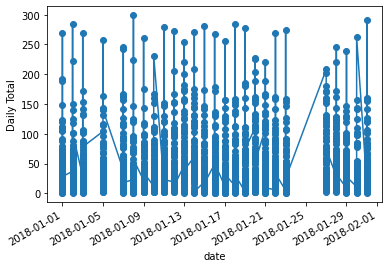

In [ ]:
# Time series
# Looking at the bluecars taken sum and bluecars returned sum time series
# Plotting the weekly oscillations.

ax = autolib_out.loc['2018-01', 'bluecars_taken_sum'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Total');

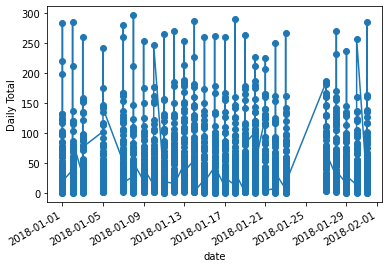

In [ ]:
# bluecars_returned_sum

ax = autolib_out.loc['2018-01', 'bluecars_returned_sum'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Total');

From the time series patterns, they look quite similar and no difference can be noticed, we then move to hypothesis testing to draw concrete insights.

### Bivariates Analysis

In [ ]:
# For bivariate summaries we use continuous variables, we are going to drop categorical variables
# Postal code we drop because we dont need it 
autolib_out1 = autolib_out.drop(['postal_code','day_type', 'day_name'], axis=1)
autolib_out1

,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum
date,,,,
2018-01-01,1440,0,19,9
2018-01-02,1438,1,10,10
2018-01-03,1439,2,11,13
2018-01-05,1440,4,10,6
2018-01-07,1440,6,28,17
...,...,...,...,...
2018-06-14,1439,3,15,13
2018-06-15,1440,4,15,10
2018-06-16,1440,5,19,19


In [ ]:
autolib_out1.head()

,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum
date,,,,
2018-01-01,1440,0,19,9
2018-01-02,1438,1,10,10
2018-01-03,1439,2,11,13
2018-01-05,1440,4,10,6
2018-01-07,1440,6,28,17


KeyboardInterrupt: ignored

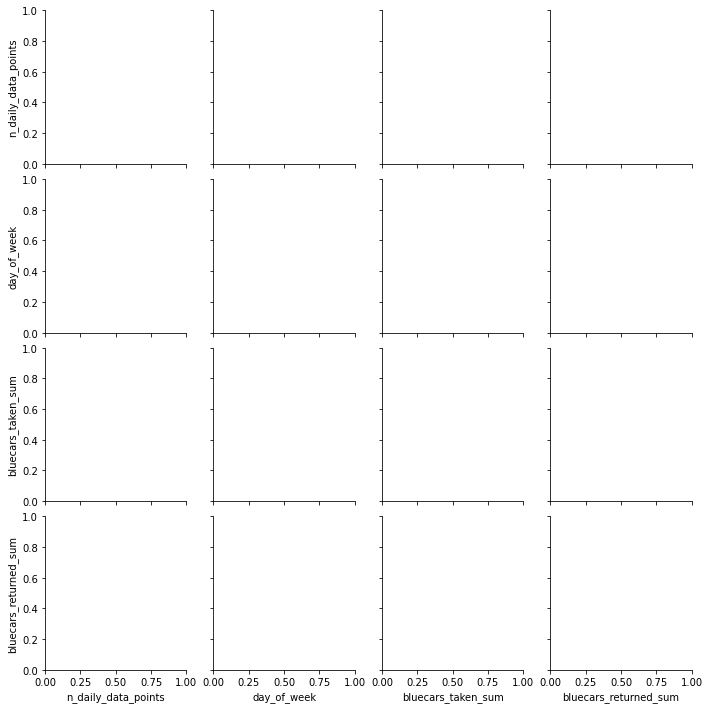

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(autolib_out1)
plt.show()


There is strong negative correlation between household size and respondent age

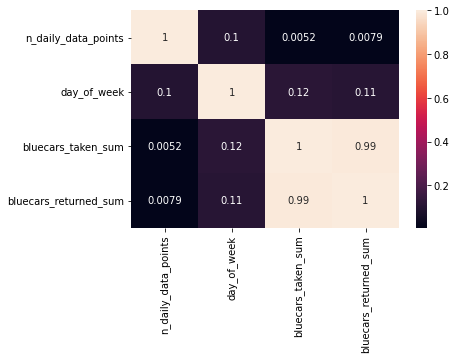

In [ ]:
sns.heatmap(autolib_out1.corr(),annot=True)
plt.show()

> The correlation matrix show the most correlated data columns with a correlation of 1.

> We see that bluecar taken and bluecar returned have a correlation of 1 meaning that most people use bluecar

## Statistical Sampling

**Hypothesis**

**Null hypothesis:** There is a difference between the average number of Bluecars taken on weekdays and the average number of Bluecars taken on weekends.

**Alternative hypothesis:** There is no difference between the average number of Bluecars taken on weekdays and the average number of Bluecars taken on weekends

**Keys**

*$H_{o}$* = Null hypothesis

*$H_{i}$* = Alternative hypothesis

$μ_{1}$ = average number of Bluecars taken on weekdays

$μ_{2}$ = average number of Bluecars taken on weekends

*$H_{o}$* : $μ_{1}$ = $μ_{2}$

*$H_{i}$* : $μ_{1}$ $\neq$ $μ_{2}$

*N* = sample size

### Stratified Sampling

In [ ]:
autolib_out.head()

,postal_code,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,day_name
date,,,,,,,
2018-01-01,91330,1440,0,weekday,19,9,Monday
2018-01-02,91330,1438,1,weekday,10,10,Tuesday
2018-01-03,91330,1439,2,weekday,11,13,Wednesday
2018-01-05,91330,1440,4,weekday,10,6,Friday
2018-01-07,91330,1440,6,weekend,28,17,Sunday


In [ ]:
# We drop the columns we are not using 
bluecar_taken = autolib_out.drop(['postal_code', 'day_of_week', 'bluecars_returned_sum'], axis=1)

In [ ]:
bluecar_taken.head()

,n_daily_data_points,day_type,bluecars_taken_sum,day_name
date,,,,
2018-01-01,1440,weekday,19,Monday
2018-01-02,1438,weekday,10,Tuesday
2018-01-03,1439,weekday,11,Wednesday
2018-01-05,1440,weekday,10,Friday
2018-01-07,1440,weekend,28,Sunday


In [ ]:
# Now we will confirm how many bluecars hired in each day of the week are there in our dataset.
# To achieve this we will use pandas .value_count() method
# To get the proportion of the non_stratified sample we find the percentage of bluecars taken in each day
# by the total number of bluecars taken over the whole week  

((bluecar_taken['day_name'].value_counts())/len(bluecar_taken))*100

Sunday       16.161213
Monday       15.452913
Tuesday      15.393057
Saturday     14.545092
Wednesday    13.826816
Friday       13.088587
Thursday     11.532322
Name: day_name, dtype: float64

In [ ]:
# To create a stratified random sample we'll use pandas groupBy method. 
# Basically what the method does is that it splits our dataset into sets and then applies a function on each subset.
# In our case, we are going to applies a function that puts each subset into a random sample with a size of 7000. 
#

# Stratified sample
bluecar_strat_output = bluecar_taken.groupby(['day_name'], group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.7))

# proportion of the non_stratified sample
print(bluecar_strat_output['day_name'].value_counts()/len(bluecar_taken)*100)

# Check the stratified output
print(bluecar_strat_output)


Sunday       11.312849
Monday       10.814046
Tuesday      10.774142
Saturday     10.185555
Wednesday     9.676776
Friday        9.158021
Thursday      8.070630
Name: day_name, dtype: float64
            n_daily_data_points day_type  bluecars_taken_sum   day_name
date                                                                   
2018-03-16                 1440  weekday                  11     Friday
2018-06-08                 1438  weekday                  67     Friday
2018-05-25                 1440  weekday                 109     Friday
2018-06-08                 1438  weekday                   9     Friday
2018-02-16                 1439  weekday                   1     Friday
...                         ...      ...                 ...        ...
2018-04-11                 1439  weekday                  14  Wednesday
2018-01-31                 1440  weekday                  81  Wednesday
2018-01-17                 1440  weekday                  15  Wednesday
2018-03-28      

## Statistical distribution.

In [ ]:
# testing for normality using the Shapiro-Wilk Test

# imporing the shapiro function
from scipy.stats import shapiro 

stat, p = shapiro(bluecar_strat_output['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.811, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Z-Distribution

In [ ]:
# import the necessary libraries to enable us compute the z-statistic
from scipy import stats
from math import sqrt


> In order to calculate the t score, we need to  separate the dataframe to calculate the mean of the weekend and weekdays 

In [ ]:
# weekday dataframe
bluecars_weekday = bluecar_strat_output[bluecar_strat_output.day_type == 'weekday']
bluecars_weekday.head()

,n_daily_data_points,day_type,bluecars_taken_sum,day_name
date,,,,
2018-03-16,1440,weekday,11,Friday
2018-06-08,1438,weekday,67,Friday
2018-05-25,1440,weekday,109,Friday
2018-06-08,1438,weekday,9,Friday
2018-02-16,1439,weekday,1,Friday


In [ ]:
# weekend dataframe
bluecars_weekend = bluecar_strat_output[bluecar_strat_output.day_type == 'weekend']
bluecars_weekend.head()

,n_daily_data_points,day_type,bluecars_taken_sum,day_name
date,,,,
2018-01-20,1439,weekend,25,Saturday
2018-01-27,1440,weekend,126,Saturday
2018-04-28,1440,weekend,143,Saturday
2018-04-14,1440,weekend,62,Saturday
2018-02-10,1440,weekend,76,Saturday


In [ ]:
# To get the means of both
# weekday dataframe
weekday_mean = bluecars_weekday['bluecars_taken_sum'].mean()

print('The mean of the weekday bluecars taken is: ', weekday_mean)


# weekend dataframe
weekend_mean = bluecars_weekend['bluecars_taken_sum'].mean()

print('The mean of the weekend bluecars taken is: ', weekend_mean)

The mean of the weekday bluecars taken is:  47.716313515737504
The mean of the weekend bluecars taken is:  61.622737819025524


In [ ]:
# calculate the standard deviation:
# weekday dataframe
weekday_std = bluecars_weekday['bluecars_taken_sum'].std()

print('The standard deviation of the weekday bluecars taken is: ', weekday_std)

# weekend dataframe
weekend_std = bluecars_weekend['bluecars_taken_sum'].std()

print('The standard deviation of the weekend bluecars taken is: ', weekend_std)

The standard deviation of the weekday bluecars taken is:  48.18172432486543
The standard deviation of the weekend bluecars taken is:  53.403164673485314


In [ ]:
n1, n2 = bluecars_weekday.shape[0], bluecars_weekend.shape[0]
print(n1)
print(n2)

4861
2155


In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

In [ ]:
#confidence level of 95%
#calculating the z score and p value of the two sample
z, p = TwoSampZ(weekday_mean, weekend_mean, weekday_std, weekend_std, n1, n2)
p_val = p
print('Z score is:', z)
print('P value is:', p_val)

Z score is: -10.362477294999469
P value is: 0.0


In [ ]:
# interpret via p-value

alpha = 0.05

if pval < alpha:
	print('Conclusion','n','Since p-value(=%f)'%(2 * pval),'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0.''')

else:

    print('Conclusion','n','Since p-value(=%f)'%(2 * pval),'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0.


## Hypothesis Conclusion

> We reject the null hypothesis that there is no difference between the average number of Bluecars taken on weekdays and the average number of Bluecars taken on weekends.

> Drawing the conclusion that there is a difference between the average number of Bluecars taken on weekdays and the average number of Bluecars taken on weekends



### a). Did we have the right data?

Yes we had the correct data that was sufficient enough to perform our needed analysis

### b). Do we need other data to answer our question?

No we do not need any other data because the one we had was able to give us insight that led to answering our questions

### c). Did we have the right question?

Yes, the answers to our question provided an indication that there is a difference between the average number of Bluecars taken on weekdays and the average number of Bluecars taken on weekends